In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score,confusion_matrix,classification_report)
import warnings
warnings.filterwarnings('ignore')

In [20]:
data=pd.read_csv('banknew.csv',delimiter = ';')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


# Data Exploration

In [21]:
data.shape

(45211, 17)

In [22]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [23]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 4.1+ MB


In [25]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

Here we can see most of the attribtes are in object form ,we have to converted to numeric form. 

In [26]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

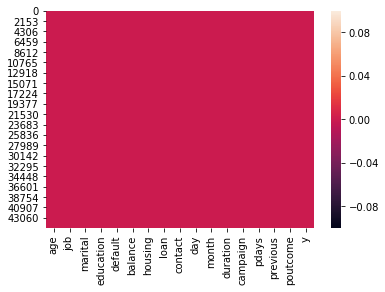

In [27]:
sns.heatmap(data.isnull())

There is no missing value in the datasets.

In [28]:
#counting target variables
from collections import Counter
Counter(data['y'])

Counter({'no': 39922, 'yes': 5289})

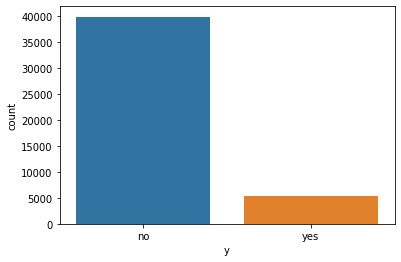

In [29]:
#plotting target variables
sns.countplot(x='y',data=data)

In [34]:
#changing categorical value to numerical value
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for col in data.columns:
    data[col]=le.fit_transform(data[col])
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,40,4,1,2,0,3036,1,0,2,4,8,261,0,0,0,3,0
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,0,3,0
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,0,3,0
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,0,3,0
4,15,11,2,3,0,917,0,0,2,4,8,198,0,0,0,3,0


After converting the categorical value into numerical value in target variable yes-->1,no-->0.

In [30]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

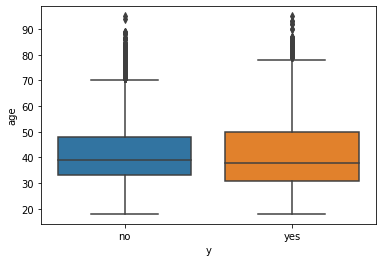

In [31]:
#checking outliers against target variable
sns.boxplot('y','age', data = data)


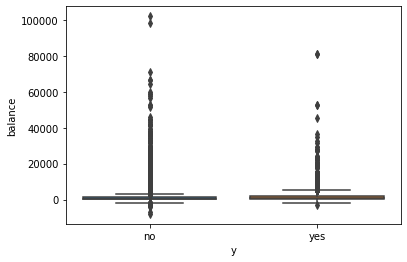

In [33]:
sns.boxplot('y','balance', data = data)

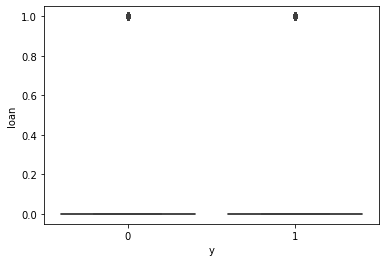

In [35]:
sns.boxplot('y','loan', data = data)

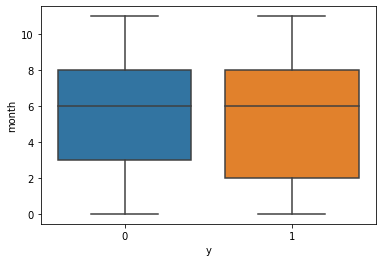

In [36]:
sns.boxplot('y','month', data = data)

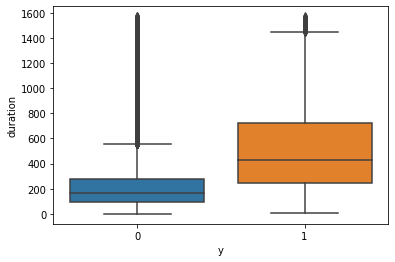

In [37]:
sns.boxplot('y','duration', data = data)

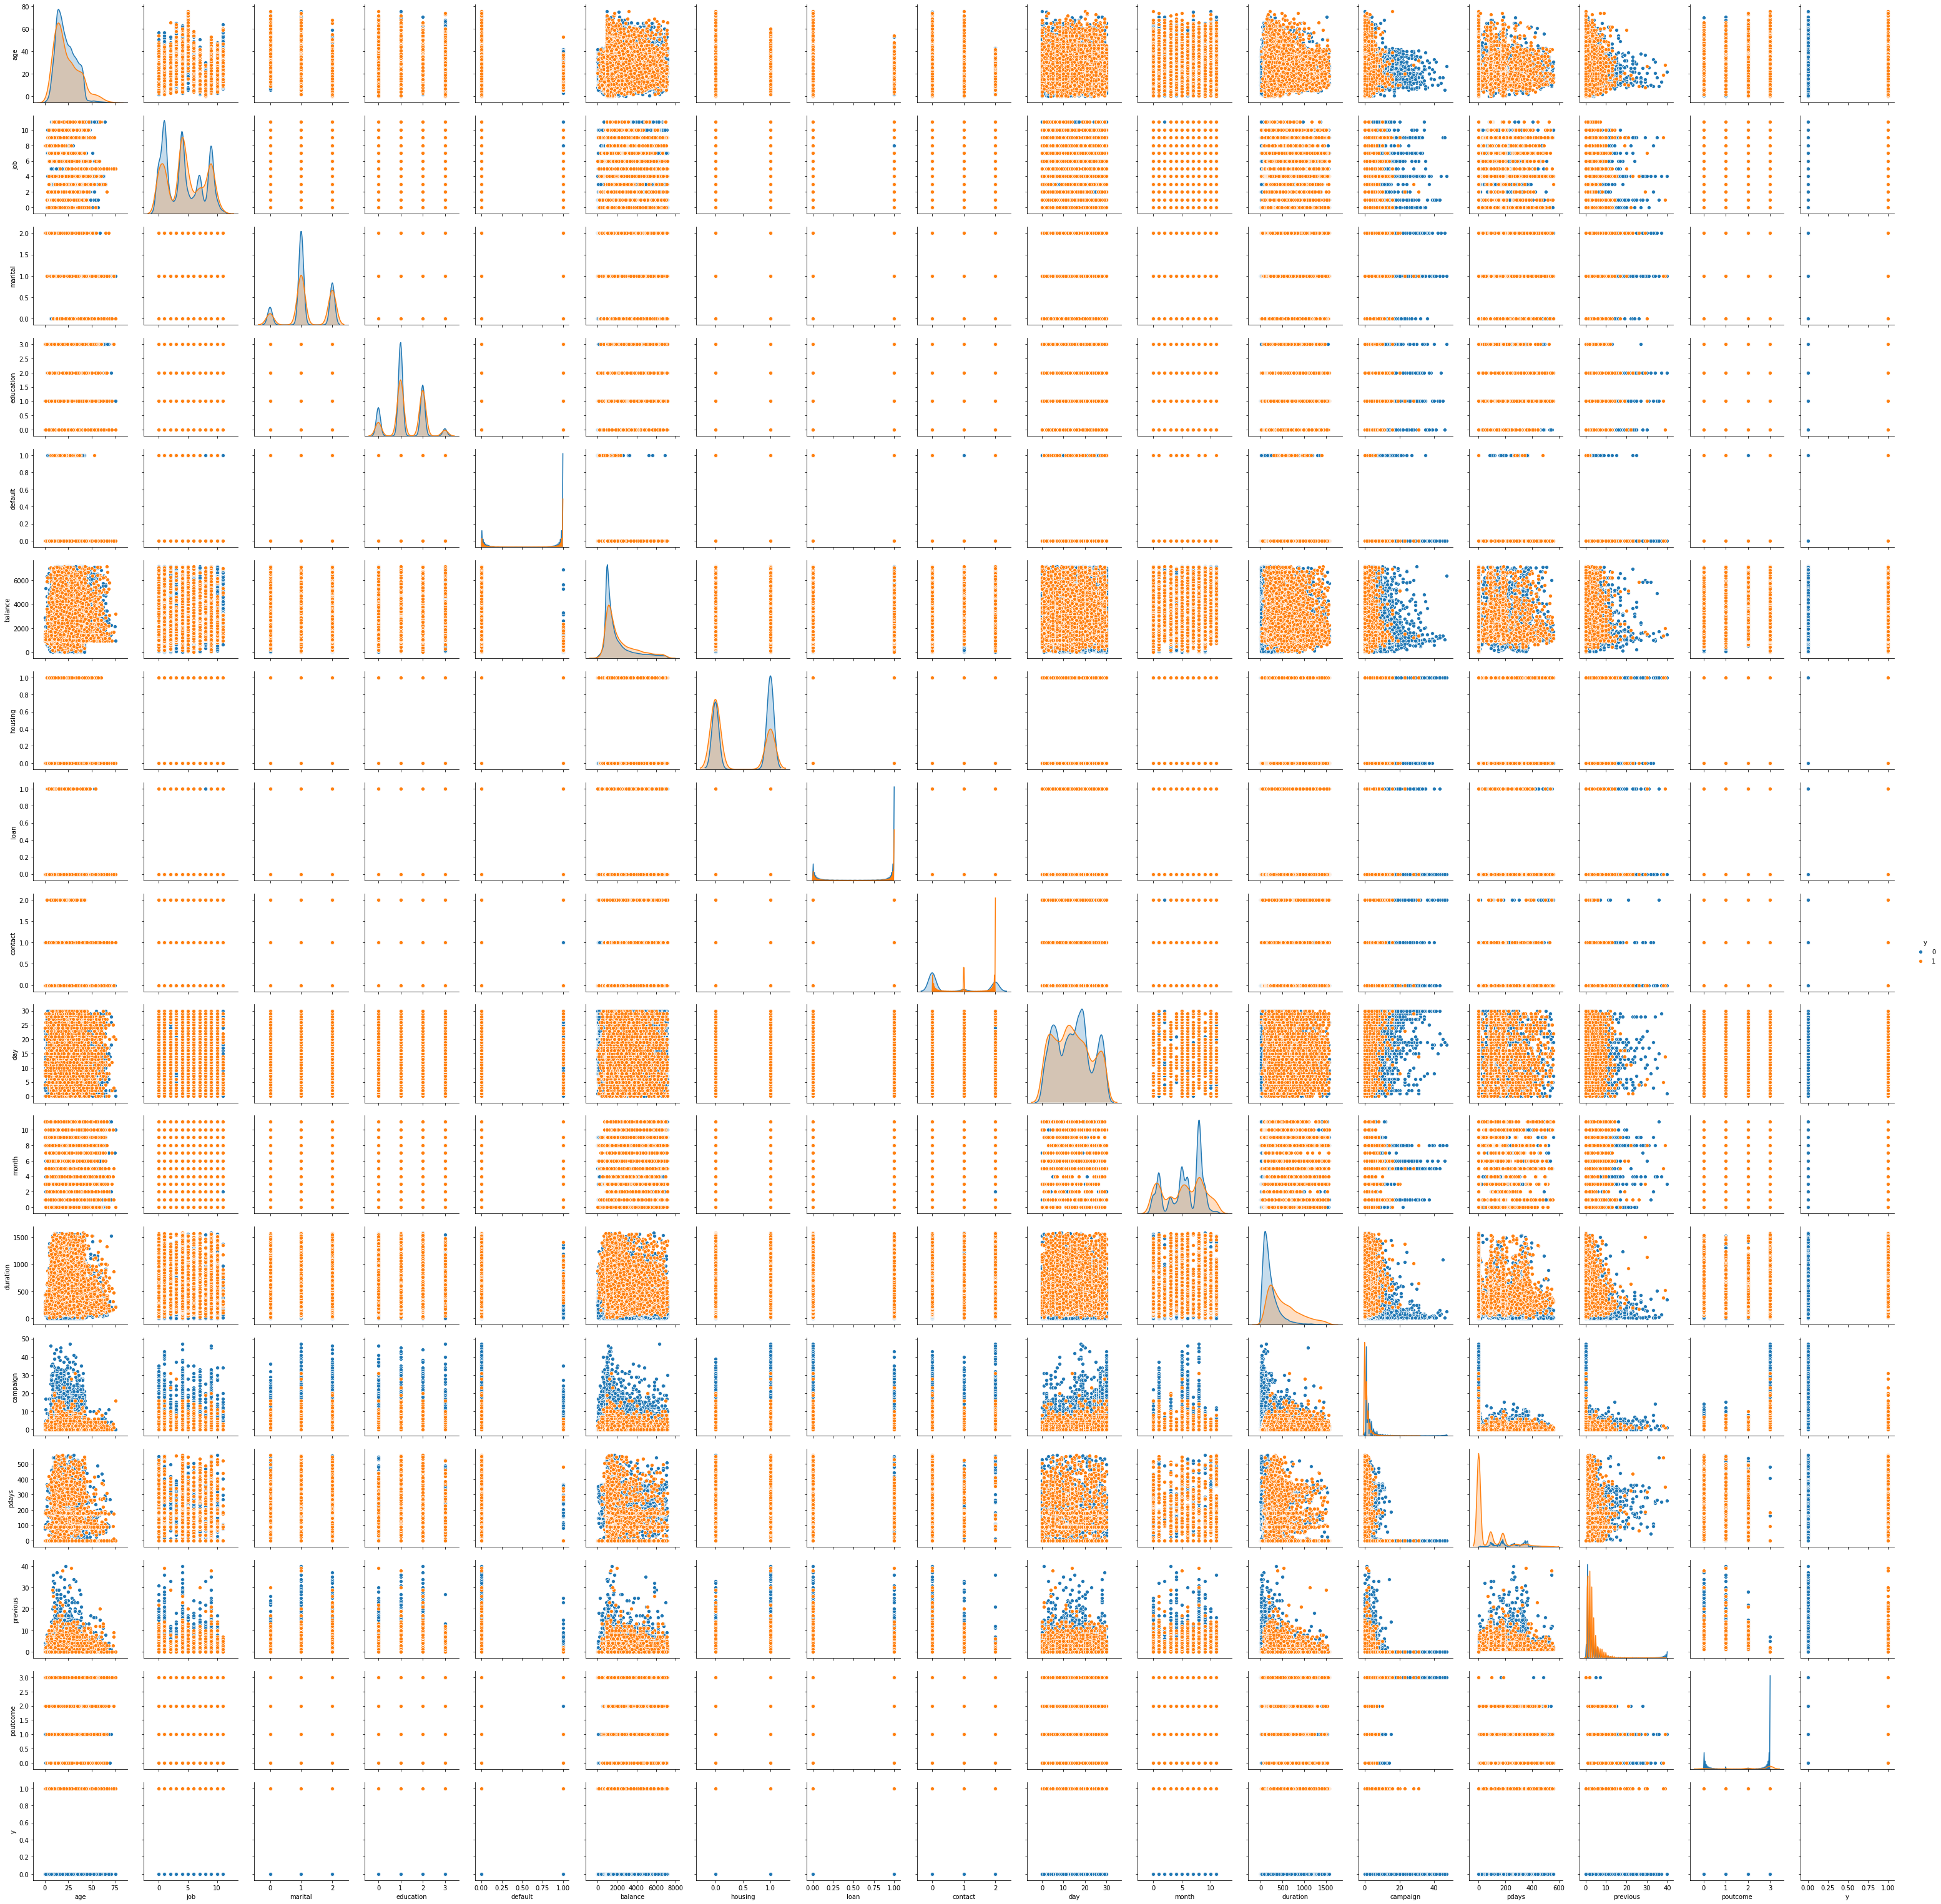

In [39]:
sns.pairplot(data,hue='y')

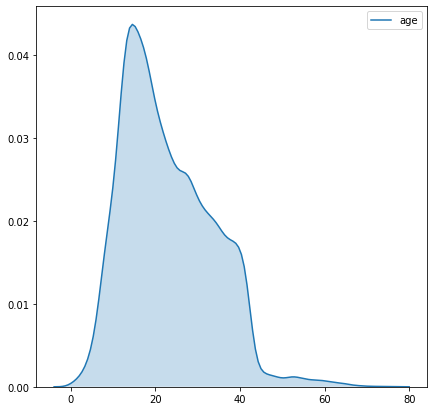

In [40]:
plt.figure(figsize=(7,7))
sns.kdeplot(data['age'],shade=True);

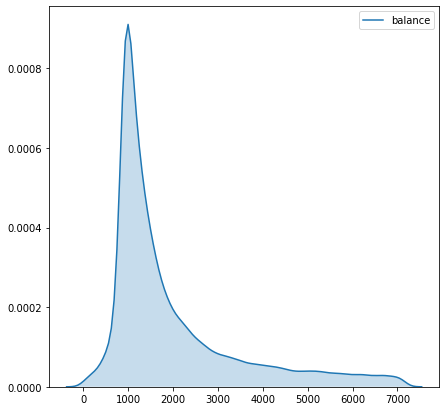

In [41]:
plt.figure(figsize=(7,7))
sns.kdeplot(data['balance'],shade=True);

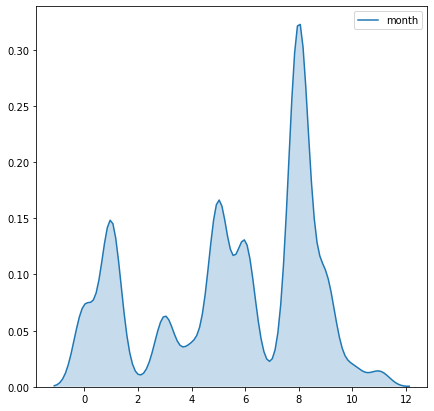

In [42]:
plt.figure(figsize=(7,7))
sns.kdeplot(data['month'],shade=True);

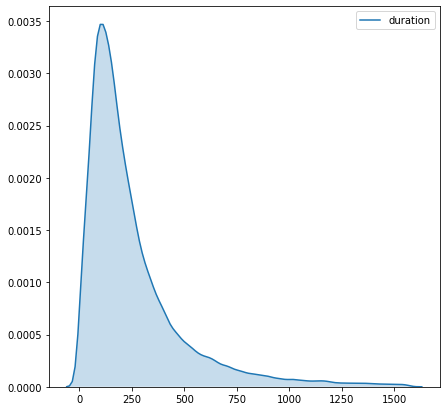

In [43]:
plt.figure(figsize=(7,7))
sns.kdeplot(data['duration'],shade=True);

In [45]:
#chcking outliers
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(data))
z

array([[1.60709428, 0.10381968, 0.27576178, ..., 0.30535358, 0.44489814,
        0.36398261],
       [0.28856445, 1.42400783, 1.3683719 , ..., 0.30535358, 0.44489814,
        0.36398261],
       [0.74742327, 0.71495069, 0.27576178, ..., 0.30535358, 0.44489814,
        0.36398261],
       ...,
       [2.9256241 , 0.20174582, 0.27576178, ..., 1.29236351, 0.56617504,
        2.74738398],
       [1.51291358, 1.02051619, 0.27576178, ..., 0.30535358, 0.44489814,
        0.36398261],
       [0.37070046, 0.71495069, 0.27576178, ..., 5.55294243, 1.57724822,
        0.36398261]])

In [46]:
threshold=3
print(np.where(z>3))
df=data[(z<3).all(axis=1)]
#chcking outliers
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(data))
z

(array([    7,    34,    37, ..., 45206, 45208, 45210], dtype=int32), array([ 4,  5, 11, ..., 11, 11, 14], dtype=int32))


array([[1.60709428, 0.10381968, 0.27576178, ..., 0.30535358, 0.44489814,
        0.36398261],
       [0.28856445, 1.42400783, 1.3683719 , ..., 0.30535358, 0.44489814,
        0.36398261],
       [0.74742327, 0.71495069, 0.27576178, ..., 0.30535358, 0.44489814,
        0.36398261],
       ...,
       [2.9256241 , 0.20174582, 0.27576178, ..., 1.29236351, 0.56617504,
        2.74738398],
       [1.51291358, 1.02051619, 0.27576178, ..., 0.30535358, 0.44489814,
        0.36398261],
       [0.37070046, 0.71495069, 0.27576178, ..., 5.55294243, 1.57724822,
        0.36398261]])

In [47]:
data.shape,df.shape

((45211, 17), (38609, 17))

In [48]:
x=df.drop('y',axis=1)
y=df['y']

In [49]:
x.shape,y.shape

((38609, 16), (38609,))

In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [51]:
from sklearn.preprocessing import MinMaxScaler
mx=MinMaxScaler()
x = mx.fit_transform(x)

In [52]:
#Train and Test data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.22, random_state = 42)

In [53]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(30115, 16)
(8494, 16)
(30115,)
(8494,)


In [54]:
#Implementation of ml models by creating a function
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
lg=LogisticRegression()
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()
gnb=GaussianNB()
rfc=RandomForestClassifier()
models = []
models.append(('lg', LogisticRegression()))
models.append(('knn', KNeighborsClassifier()))
models.append(('dtc', DecisionTreeClassifier()))
models.append(('gnb', GaussianNB()))
models.append(('rfc',RandomForestClassifier()))

In [1]:
def my_model(models):
    models.fit(x_train,y_train)
    pred=models.predict(x_test)
    print(accuracy_score(y_test,pred)*100)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

In [56]:
my_model(lg)

91.17023781492819
[[7560  138]
 [ 612  184]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7698
           1       0.57      0.23      0.33       796

    accuracy                           0.91      8494
   macro avg       0.75      0.61      0.64      8494
weighted avg       0.89      0.91      0.89      8494



In [57]:
my_model(knn)

91.21732987991523
[[7531  167]
 [ 579  217]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7698
           1       0.57      0.27      0.37       796

    accuracy                           0.91      8494
   macro avg       0.75      0.63      0.66      8494
weighted avg       0.89      0.91      0.90      8494



In [60]:
my_model(dtc)

88.93336472804333
[[7189  509]
 [ 431  365]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7698
           1       0.42      0.46      0.44       796

    accuracy                           0.89      8494
   macro avg       0.68      0.70      0.69      8494
weighted avg       0.89      0.89      0.89      8494



In [59]:
my_model(rfc)

91.59406639981164
[[7539  159]
 [ 555  241]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7698
           1       0.60      0.30      0.40       796

    accuracy                           0.92      8494
   macro avg       0.77      0.64      0.68      8494
weighted avg       0.90      0.92      0.90      8494



# Grid Search CV

In [61]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    }     
}

In [62]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
scores = []
from sklearn.preprocessing import MinMaxScaler
mx=MinMaxScaler()
x= mx.fit_transform(x)




for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=10, return_train_score=False)
    clf.fit(x,y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df1= pd.DataFrame(scores,columns=['model','best_score','best_params'])
df1

,model,best_score,best_params
0,svm,0.902691,"{'C': 10, 'kernel': 'rbf'}"
1,random_forest,0.813515,{'n_estimators': 10}
2,logistic_regression,0.897459,{'C': 1}
3,naive_bayes_gaussian,0.830635,{}
4,naive_bayes_multinomial,0.900904,{}
5,decision_tree,0.682328,{'criterion': 'entropy'}


In [63]:
from sklearn.externals import joblib
#saving the model as pickl
joblib.dump(rfc,"Project 37_banknote.pkl")

['Project 37_banknote.pkl']

In [64]:
x= joblib.load("Project 37_banknote.pkl")

In [65]:
x.predict(x_test)

array([0, 0, 0, ..., 0, 0, 1])